In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [ ]:
shape = (96,96)

images = []       
labels = []

genre = ['anime','action','romance']
path = '/content/drive/My Drive/image'
'''
for x in genre:
  print(x)
  count = 0 
  for filename in os.listdir('/content/drive/My Drive/image'+'/'+x):
    if count == 1000:
      break
    else:
      print(filename)
      img = cv2.imread(path+'/'+x+'/'+filename)
      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      
      norm_img = np.zeros(shape)
      final_img = cv2.normalize(RGB_img,norm_img, 0,1, cv2.NORM_MINMAX,dtype=cv2.CV_32F)
      
      # Spliting file names and storing the labels for image in list
      labels.append(x)
      
      # Resize all images to a specific shape
      
      img2 = cv2.resize(final_img,shape)
      
      #img2 = cv2.resize(RGB_img,shape)

      
      images.append(img2)

      count+=1
      print(len(images))
      print(len(labels))

'''

#np.savez("/content/drive/My Drive/image/224.npz",images=np.asarray(images), labels=np.asarray(labels))





"\nfor x in genre:\n  print(x)\n  count = 0 \n  for filename in os.listdir('/content/drive/My Drive/image'+'/'+x):\n    if count == 1000:\n      break\n    else:\n      print(filename)\n      img = cv2.imread(path+'/'+x+'/'+filename)\n      RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n      \n      norm_img = np.zeros(shape)\n      final_img = cv2.normalize(RGB_img,norm_img, 0,1, cv2.NORM_MINMAX,dtype=cv2.CV_32F)\n      \n      # Spliting file names and storing the labels for image in list\n      labels.append(x)\n      \n      # Resize all images to a specific shape\n      \n      img2 = cv2.resize(final_img,shape)\n      \n      #img2 = cv2.resize(RGB_img,shape)\n\n      \n      images.append(img2)\n\n      count+=1\n      print(len(images))\n      print(len(labels))\n\n"

[[[0.3632353  0.35147062 0.22990197]
  [0.39117652 0.38235295 0.26078433]
  [0.38186276 0.37009805 0.24852943]
  ...
  [0.00392157 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.3529412  0.34901962 0.227451  ]
  [0.36078432 0.34901962 0.227451  ]
  [0.35457516 0.34281048 0.22124185]
  ...
  [0.00392157 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.40277782 0.39885622 0.2772876 ]
  [0.352451   0.3485294  0.22696081]
  [0.35686275 0.34509805 0.22352943]
  ...
  [0.00392157 0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.12941177 0.0627451  0.08627451]
  [0.12941177 0.0627451  0.08627451]
  [0.12941177 0.0627451  0.08627451]
  ...
  [0.02352941 0.         0.01568628]
  [0.02352941 0.00196078 0.01764706]
  [0.         0.00784314 0.01960784]]

 [[0.1263072  0.05964053 0.08316994]
  [0.12941177 0.0627451  0.08627451]


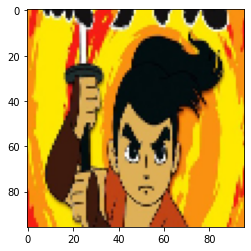

In [ ]:


from keras.preprocessing.image import ImageDataGenerator
'''
aug = ImageDataGenerator(
    rotation_range=180,
    zoom_range=0.15,
    width_shift_range=1,
    height_shift_range=1,
    shear_range=1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
'''
'''
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.05,
    width_shift_range=0.5,
    height_shift_range=0.5,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')
    '''
'''

aug = ImageDataGenerator(
    rotation_range=270,
    zoom_range=0.5,
    width_shift_range=2,
    height_shift_range=2,
    shear_range=2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

'''


aug = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest')


data = np.load("/content/drive/My Drive/image/96.npz")
#print(data['images'] == np.asarray(images))
images2 = data['images']
labels2 = data['labels'].tolist()
print(images2[0])

# Converting labels into One Hot encoded sparse matrix
print(pd.get_dummies(labels2))
labels2 = pd.get_dummies(labels2).values

x_train,x_test,y_train,y_test = train_test_split(images2,labels2,test_size =0.15,random_state=1,stratify=labels2)

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.15,random_state=1,stratify=y_train)

print(labels2[8])
plt.imshow(images2[8])

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_86 (Conv2D)           (None, 22, 22, 96)        34944     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 10, 10, 96)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 10, 10, 256)       614656    
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 4, 4, 384)         885120    
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 4, 4, 384)         1327488   
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 4, 4, 256)       

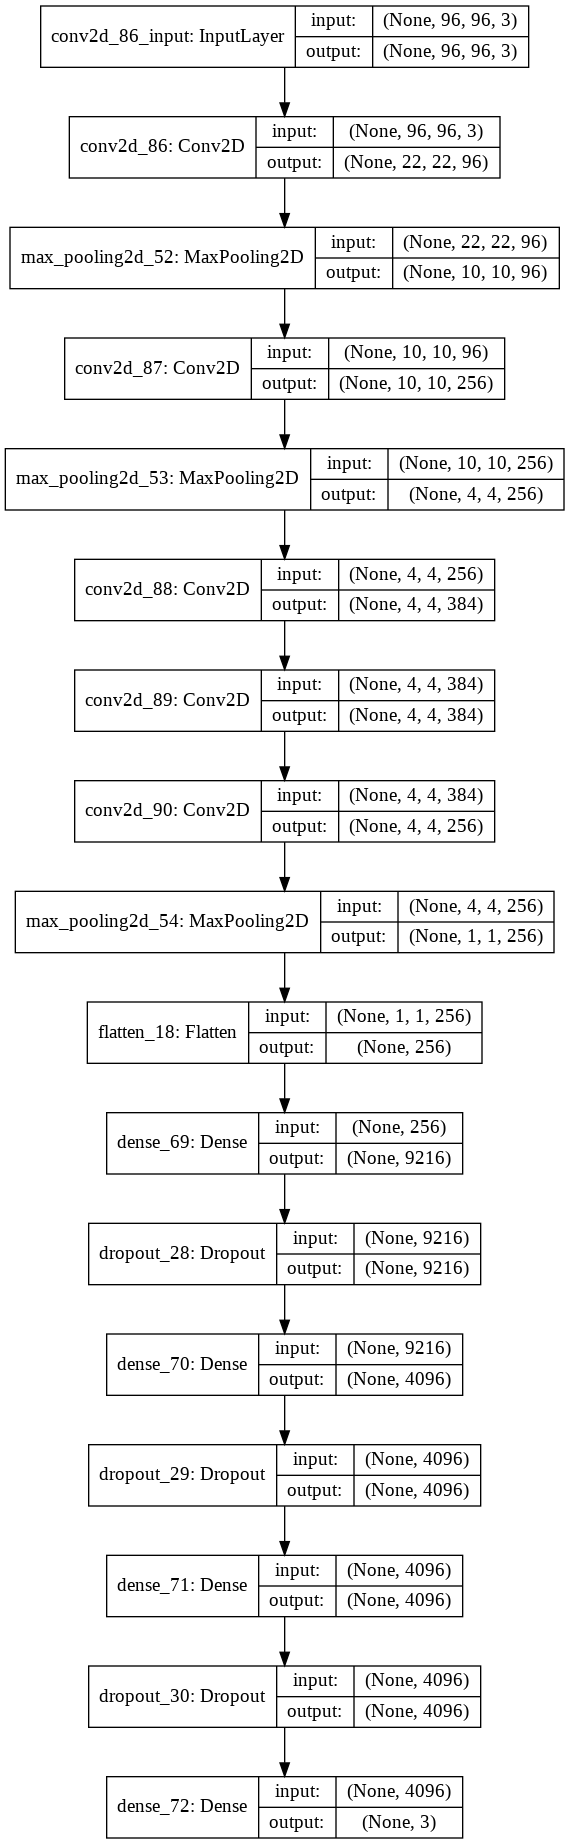

In [ ]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(96,96,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))
model.add(Dropout(0.1))
# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.1))
# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))
model.add(Dropout(0.1))
# Output Layer
model.add(Dense(3, activation = "softmax"))

from keras.optimizers import Adam, SGD
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/image/alex/alex_final.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Training the model
#history = model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_val,y_val))
history = model.fit_generator(aug.flow(x_train,y_train,batch_size = 32),validation_data=(x_val,y_val),steps_per_epoch=len(x_train)//32,epochs=30)

Epoch 1/30
67/67 [==============================] - 5s 73ms/step - loss: 1.0916 - accuracy: 0.3489 - val_loss: 1.0679 - val_accuracy: 0.4282
Epoch 2/30
67/67 [==============================] - 5s 69ms/step - loss: 1.0193 - accuracy: 0.4745 - val_loss: 0.9418 - val_accuracy: 0.5457
Epoch 3/30
67/67 [==============================] - 5s 68ms/step - loss: 0.9586 - accuracy: 0.5307 - val_loss: 0.9281 - val_accuracy: 0.5405
Epoch 4/30
67/67 [==============================] - 5s 69ms/step - loss: 0.9467 - accuracy: 0.5274 - val_loss: 0.9742 - val_accuracy: 0.5196
Epoch 5/30
67/67 [==============================] - 5s 68ms/step - loss: 0.9365 - accuracy: 0.5461 - val_loss: 0.9407 - val_accuracy: 0.5352
Epoch 6/30
67/67 [==============================] - 5s 68ms/step - loss: 0.9309 - accuracy: 0.5494 - val_loss: 0.9562 - val_accuracy: 0.5091
Epoch 7/30
67/67 [==============================] - 5s 67ms/step - loss: 0.9176 - accuracy: 0.5513 - val_loss: 0.9605 - val_accuracy: 0.5248
Epoch 8/30
67

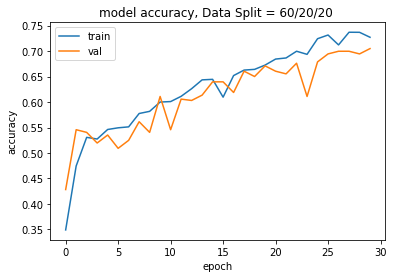

   accuracy  val_accuracy
0  0.325335      0.334204
1  0.325335      0.334204
2  0.324873      0.334204
[0.7271872] [0.704960823059082]
   accuracy  val_accuracy
0  0.325335      0.334204
1  0.325335      0.334204
2  0.324873      0.334204
3  0.727187      0.704961


In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy, Data Split = 60/20/20 ')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig("/content/drive/My Drive/image/alex/60acc.png")
plt.show()


# list of strings 
accuracy = [] 
  
# list of int 
val_accuracy = [] 


# import pandas as pd 
accuracy.append(history.history['accuracy'][-1])
val_accuracy.append(history.history['val_accuracy'][-1])  

'''
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(accuracy, val_accuracy)), 
               columns =['accuracy', 'val_accuracy']) 

df.to_csv("/content/drive/My Drive/image/size_acc.csv",index=False)
'''
df = pd.read_csv("/content/drive/My Drive/image/size_acc.csv")
print(df)
print(accuracy,val_accuracy)
df.loc[len(df)] = [history.history['accuracy'][-1],history.history['val_accuracy'][-1]]
print(df)
#df.to_csv("/content/drive/My Drive/image/size_acc.csv",index=False)



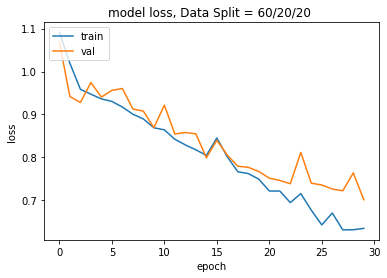

       loss  val_loss
0  1.098679  1.098613
1  1.098681  1.098613
2  1.098681  1.098612
[0.6346472920473185] [0.7013582910943592]
       loss  val_loss
0  1.098679  1.098613
1  1.098681  1.098613
2  1.098681  1.098612
3  0.634647  0.701358


In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss, Data Split = 60/20/20 ')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig("/content/drive/My Drive/image/alex/60loss.png")
plt.show()


# list of strings 
loss = [] 
  
# list of int 
val_loss = [] 

# import pandas as pd 
loss.append(history.history['loss'][-1])
val_loss.append(history.history['val_loss'][-1])  

'''
# Calling DataFrame constructor after zipping 
# both lists, with columns specified 
df = pd.DataFrame(list(zip(loss, val_loss)), 
               columns =['loss', 'val_loss']) 

df.to_csv("/content/drive/My Drive/image/size_loss.csv",index=False)
'''

df = pd.read_csv("/content/drive/My Drive/image/size_loss.csv")
print(df)
print(loss,val_loss)
df.loc[len(df)] = [history.history['loss'][-1],history.history['val_loss'][-1]  ]
print(df)





450
anime
Actual :-  anime
Predicted :-  anime
Actual :-  anime
Predicted :-  anime
Actual :-  romance
Predicted :-  romance
Actual :-  anime
Predicted :-  anime
Actual :-  romance
Predicted :-  action
Actual :-  romance
Predicted :-  action
Actual :-  action
Predicted :-  action
Actual :-  romance
Predicted :-  romance
Actual :-  romance
Predicted :-  anime
Actual :-  action
Predicted :-  action
Actual :-  action
Predicted :-  action
Actual :-  action
Predicted :-  action
Actual :-  romance
Predicted :-  romance
Actual :-  action
Predicted :-  action
Actual :-  anime
Predicted :-  action
Actual :-  romance
Predicted :-  romance
Actual :-  action
Predicted :-  action
Actual :-  anime
Predicted :-  anime
Actual :-  romance
Predicted :-  anime
Actual :-  romance
Predicted :-  romance
Actual :-  romance
Predicted :-  romance
Actual :-  anime
Predicted :-  romance
Actual :-  romance
Predicted :-  romance
Actual :-  anime
Predicted :-  romance
Actual :-  romance
Predicted :-  romance
Actual

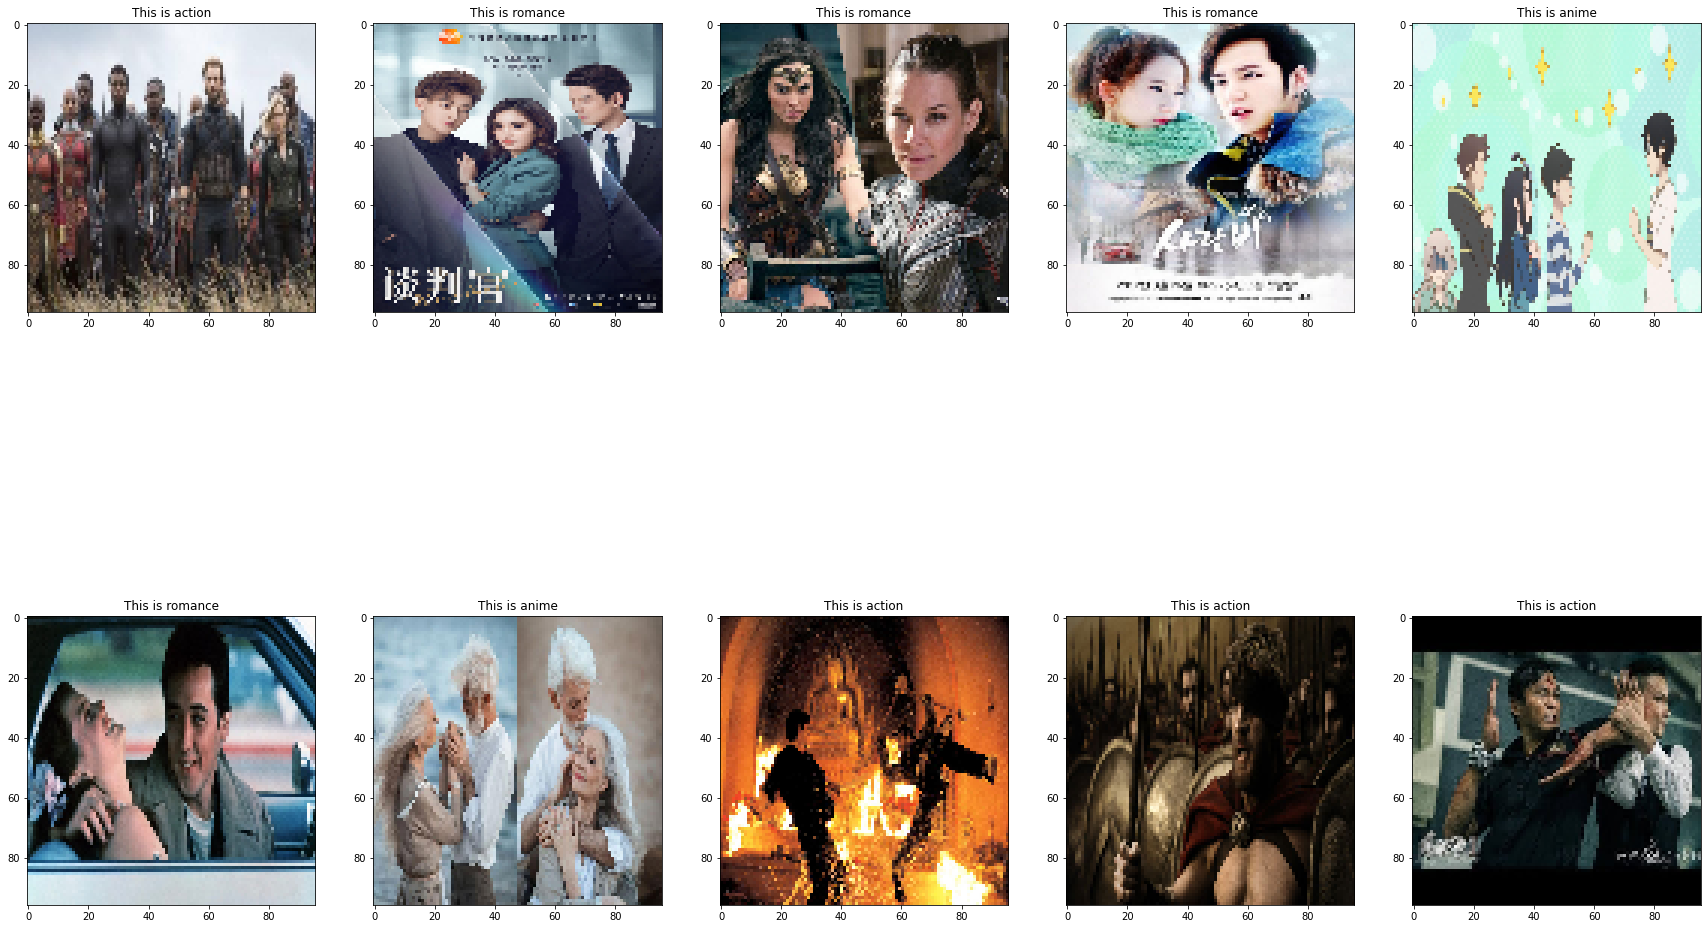

69.55555555555556


In [ ]:

# Testing predictions and the actual label
checkImage = x_test
checklabel = y_test
print(len(checkImage))
predict = model.predict(checkImage)

output = { 0:'action',1:'anime',2:'romance'}
label = {'[1 0 0]':'action','[0 1 0]':'anime','[0 0 1]':'romance'}

print(label[str(checklabel[0])])

result = 0
for x in range(450):
  predicted = output[np.argmax(predict[x])]
  actual = label[str(checklabel[x])]
  print("Actual :- ",actual)
  print("Predicted :- ",predicted)
  if actual==predicted:
    result+=1
  else:
    continue

i=0
plt.figure(figsize=(30,20))
for x in range(200,450):
  predicted = output[np.argmax(predict[x])]
  actual = label[str(checklabel[x])]
  #print("Actual :- ",actual)
  #print("Predicted :- ",predicted)
  #if actual==predicted:
  #  result+=1
  #else:
  #  continue 
  plt.subplot(2, 5, i + 1)
  plt.title('This is '+ predicted)
  imgplot = plt.imshow(checkImage[x])
  i +=1
  if i % 10 ==0:
    break

plt.show()

print((result/450)*100)



